<a href="https://colab.research.google.com/github/rvargas42/TensorFlow_DeepLearningAI_Course/blob/main/C2/C2_W2_Lab1_Cats_vs_Dogs_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 1 Cat vs Dogs. Using CNNs**

# 1. Importing Data

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-04-19 10:35:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 142.251.167.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   181MB/s    in 0.4s    

2024-04-19 10:35:39 (181 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

filezip = './cats_and_dogs_filtered.zip'
with zipfile.ZipFile(filezip, 'r') as ref:
    ref.extractall()
ref.close()

In [ ]:
import os

base_dir = "cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

train_cats, train_dogs = os.path.join(base_dir,'train', 'cats'), os.path.join(base_dir,'train', 'dogs')
validation_cats, validation_dogs = os.path.join(base_dir,'validation', 'cats'), os.path.join(base_dir,'validation', 'dogs')

train_cat_fnames = os.listdir( train_cats )
train_dog_fnames = os.listdir( train_dogs )

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

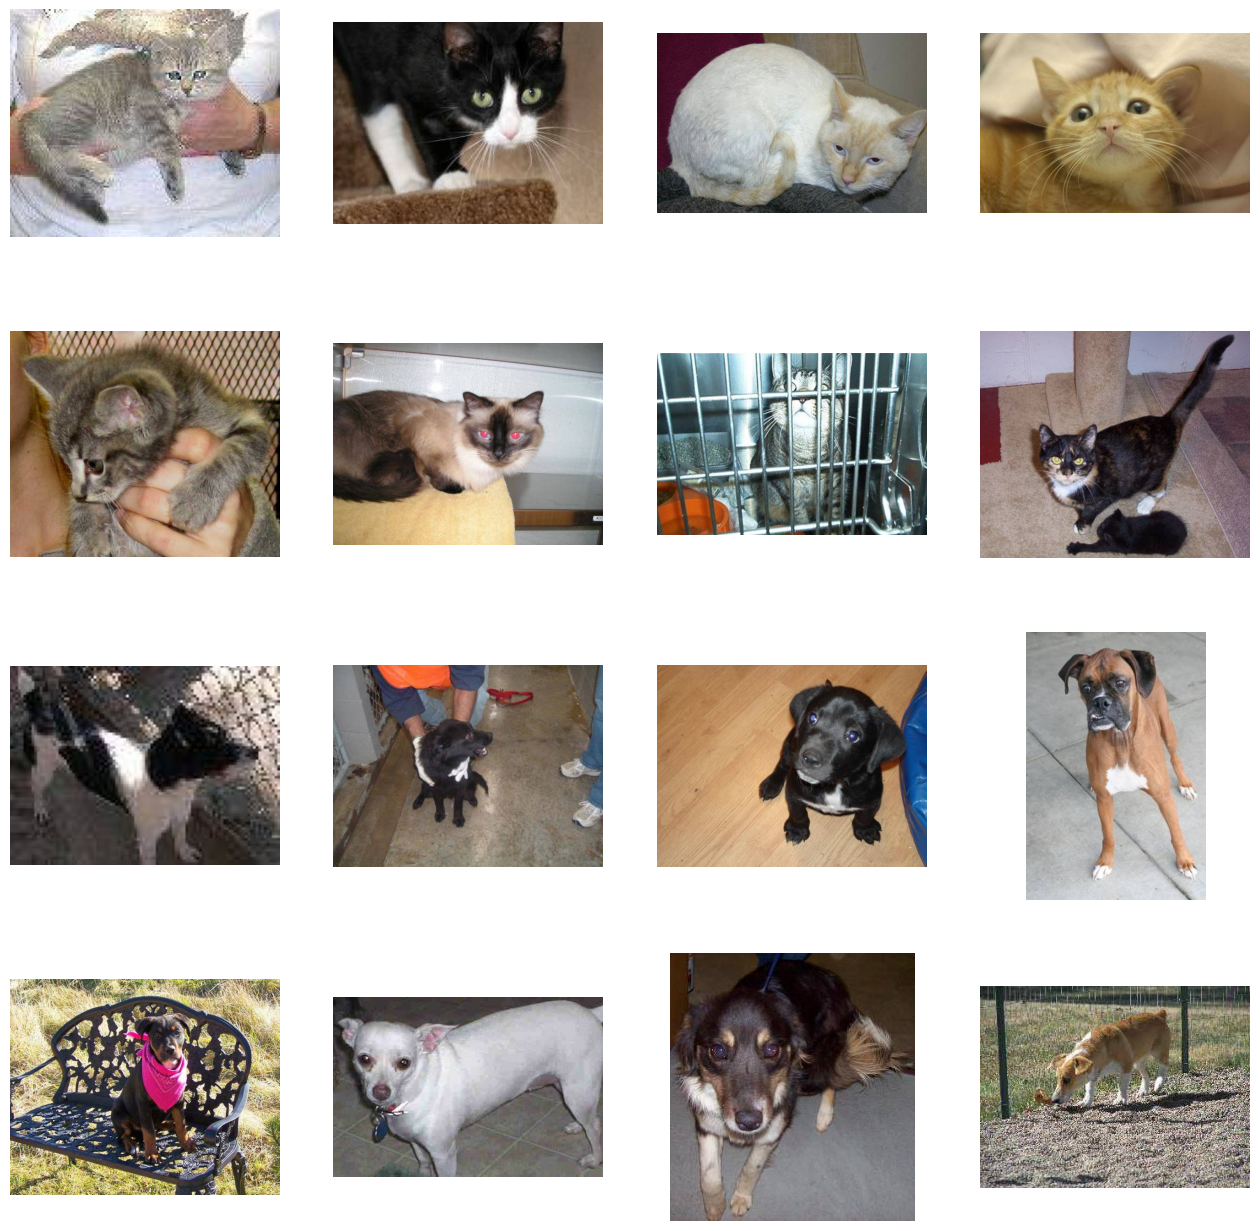

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 2. Defining the Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


In [ ]:
model = tf.keras.models.Sequential(
    [
        keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")

    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy",metrics="accuracy")

# 3. DATA preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainDataGenerator = ImageDataGenerator(rescale=1/255)
testDataGenerator = ImageDataGenerator(rescale=1/255)

trainImgGen = trainDataGenerator.flow_from_directory(train_dir, batch_size=20, class_mode="binary", target_size=(150,150))
validationImgGen = trainDataGenerator.flow_from_directory(val_dir, batch_size=20, class_mode="binary", target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 4. Training

In [ ]:
history = model.fit(
    trainImgGen,
    steps_per_epoch=100,
    epochs = 15,
    validation_data = validationImgGen,
    verbose=2
)

Epoch 1/15
100/100 - 59s - loss: 0.7763 - accuracy: 0.5325 - val_loss: 0.6747 - val_accuracy: 0.6300 - 59s/epoch - 595ms/step
Epoch 2/15
100/100 - 52s - loss: 0.6610 - accuracy: 0.6320 - val_loss: 0.6311 - val_accuracy: 0.6600 - 52s/epoch - 519ms/step
Epoch 3/15
100/100 - 51s - loss: 0.6030 - accuracy: 0.6820 - val_loss: 0.5847 - val_accuracy: 0.6820 - 51s/epoch - 512ms/step
Epoch 4/15
100/100 - 54s - loss: 0.5671 - accuracy: 0.7170 - val_loss: 0.5963 - val_accuracy: 0.6750 - 54s/epoch - 537ms/step
Epoch 5/15
100/100 - 57s - loss: 0.5199 - accuracy: 0.7340 - val_loss: 0.6185 - val_accuracy: 0.6880 - 57s/epoch - 570ms/step
Epoch 6/15
100/100 - 57s - loss: 0.4823 - accuracy: 0.7700 - val_loss: 0.5543 - val_accuracy: 0.7240 - 57s/epoch - 571ms/step
Epoch 7/15
100/100 - 55s - loss: 0.4258 - accuracy: 0.7985 - val_loss: 0.6366 - val_accuracy: 0.6840 - 55s/epoch - 546ms/step
Epoch 8/15
100/100 - 50s - loss: 0.3649 - accuracy: 0.8405 - val_loss: 0.5826 - val_accuracy: 0.7270 - 50s/epoch - 496

{'loss': [0.7763209342956543, 0.6609533429145813, 0.6030078530311584, 0.5671176314353943, 0.5199208855628967, 0.4823276996612549, 0.4257703423500061, 0.3648650646209717, 0.2977120876312256, 0.23842188715934753, 0.1744707226753235, 0.11313974857330322, 0.06257795542478561, 0.0701868012547493, 0.049890413880348206], 'accuracy': [0.5325000286102295, 0.6320000290870667, 0.6819999814033508, 0.7170000076293945, 0.734000027179718, 0.7699999809265137, 0.7985000014305115, 0.840499997138977, 0.8669999837875366, 0.8970000147819519, 0.9325000047683716, 0.953499972820282, 0.9769999980926514, 0.9810000061988831, 0.9884999990463257], 'val_loss': [0.6746622323989868, 0.6310572028160095, 0.5847134590148926, 0.5962585806846619, 0.6184626817703247, 0.5543030500411987, 0.6366363763809204, 0.5826459527015686, 0.7167237997055054, 0.9640538096427917, 0.8235262036323547, 1.0514034032821655, 1.2729058265686035, 1.218335747718811, 1.3190838098526], 'val_accuracy': [0.6299999952316284, 0.6600000262260437, 0.6819

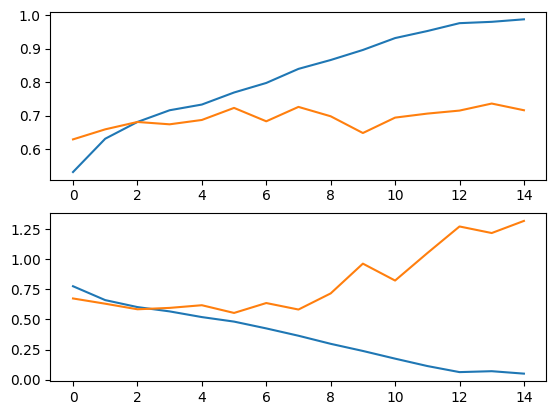

In [ ]:
fig, axs = plt.subplots(2,1)
history_params = history.history
acc = history_params["accuracy"]
val_acc = history_params["val_accuracy"]
loss = history_params["loss"]
val_loss = history_params["val_loss"]

epochs = range(len(acc))

axs[0].plot(epochs,acc)
axs[0].plot(epochs,val_acc)

axs[1].plot(epochs,loss)
axs[1].plot(epochs,val_loss)
print(history.history)

# 5. Test the model

In [ ]:
from google.colab import files

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving istockphoto-1482199015-612x612.webp to istockphoto-1482199015-612x612 (1).webp
1/1 [==============================] - 0s 125ms/step
[0.70039606]
istockphoto-1482199015-612x612 (1).webp is a dog


1/1 [==============================] - 0s 103ms/step


<ipython-input-28-a05506ef5934>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
<ipython-input-28-a05506ef5934>:51: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


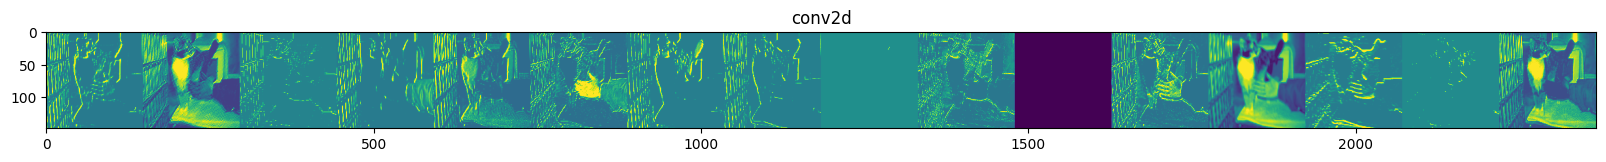

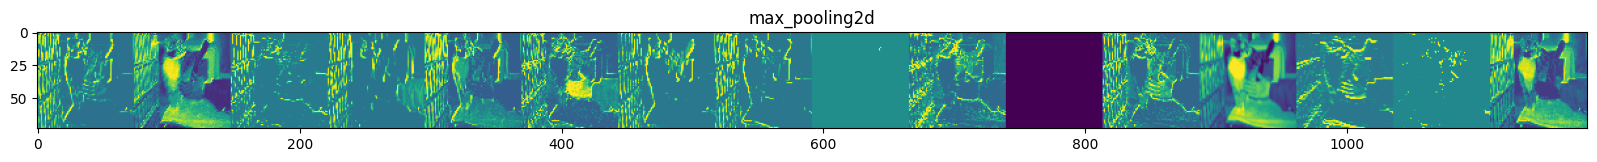

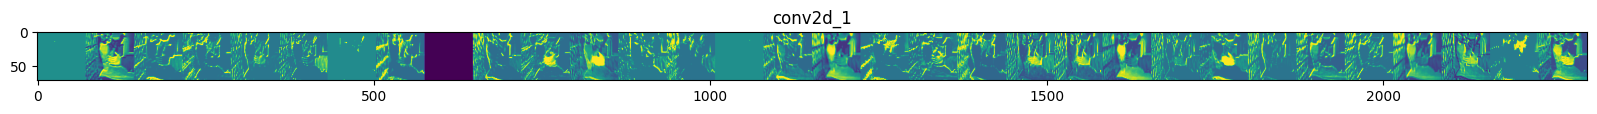

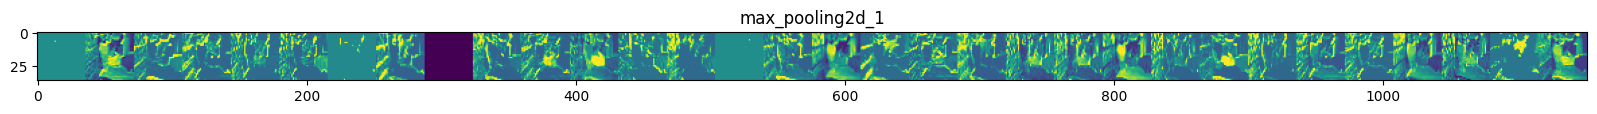

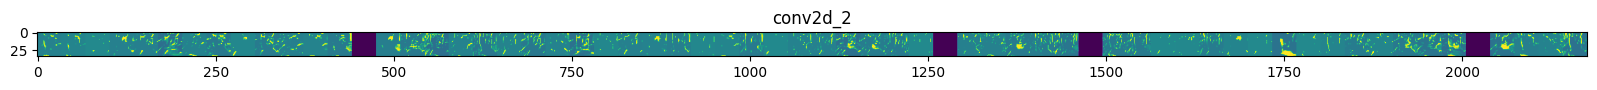

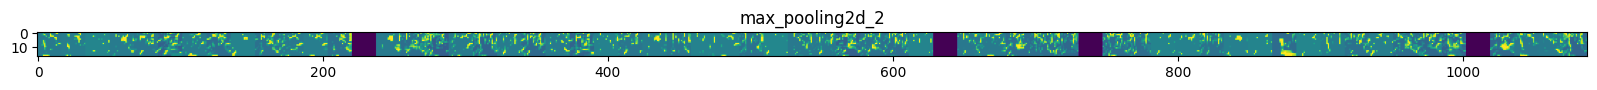

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )